In [1]:
import os
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 120)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

I started by importing the core libraries I’ll use throughout the analysis. I also set a few display options so I can inspect wide tables easily during EDA, and fixed a random seed to keep results reproducible.

In [2]:
DATA_DIR = "C:/Users/rocke/procdna_case/data"
events_path = os.path.join(DATA_DIR, "events_status_shipments.csv")
hcps_path   = os.path.join(DATA_DIR, "hcps_master.csv")
payers_path = os.path.join(DATA_DIR, "payers_master.csv")

events = pd.read_csv(events_path)
hcps   = pd.read_csv(hcps_path)
payers = pd.read_csv(payers_path)

print("events_status_shipments:", events.shape)
print("hcps_master:", hcps.shape)
print("payers_master:", payers.shape)

display(events.head(3))
display(hcps.head(3))
display(payers.head(3))

events_status_shipments: (44601, 33)
hcps_master: (120, 9)
payers_master: (24, 11)


,patient_id,site_id,payer_id,plan_variant_id,sp_id,event_timestamp,event_type,event_outcome,payer_channel,plan_type_bucket,coverage_posture_segment,step_therapy_required_flag,pbm_segment,patient_cost_share_level,site_type,specialty_bucket,field_region_bucket,patient_age_band,patient_gender,status_code,status_reason_bucket,days_supply,fill_number,shipment_status,oop_cost_share_bucket,refill_requested_flag,refill_rejected_flag,support_call_type,is_prediction_anchor,expected_refill_due_date,discontinued_within_60d,label_eligible,days_since_prev_event
0,PAT_00001,SITE_0116,PAYER_018,PAYER_018_B,SP_003,2024-08-05,Referral_Received,Referral_Received,Government,Government Program-like,Approved-lean,1,PBM Segment B,Low,Specialty Center,Pediatric specialty,Region_D,Adult 18+,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,PAT_00001,SITE_0116,PAYER_018,PAYER_018_B,SP_003,2024-08-07,Benefits_Investigation_Started,BI_Started,Government,Government Program-like,Approved-lean,1,PBM Segment B,Low,Specialty Center,Pediatric specialty,Region_D,Adult 18+,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2.0
2,PAT_00001,SITE_0116,PAYER_018,PAYER_018_B,SP_003,2024-08-10,PA_Submitted,PA_Submitted,Government,Government Program-like,Approved-lean,1,PBM Segment B,Low,Specialty Center,Pediatric specialty,Region_D,Adult 18+,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,3.0


,site_id,site_type,specialty_bucket,years_experience,center_of_excellence_flag,key_opinion_leader_flag,hcp_event_participation_last_12mo,historical_discontinuation_rate_12mo,field_region_bucket
0,SITE_0001,Community Clinic,Neurology-like,18,0,0,2,0.471,Region_A
1,SITE_0002,Long-term Care,Pediatric specialty,27,0,0,0,0.362,Region_B
2,SITE_0003,Community Clinic,Neurology-like,8,0,0,2,0.230,Region_C


,payer_id,payer_channel,plan_type_bucket,coverage_posture_segment,step_therapy_required_flag,pbm_segment,avg_patient_cost_share_level,avg_pa_turnaround_days,pa_denial_rate,refill_reject_rate,appeal_success_rate
0,PAYER_001,Government,Government Program-like,Exception-only,1,PBM Segment B,1.0,17,NaN,1.0,NaN
1,PAYER_002,Commercial,Commercial PPO-like,Approved-lean,0,PBM Segment C,2.0,12,NaN,1.0,NaN
2,PAYER_003,Commercial,Commercial PPO-like,Approved-lean,0,PBM Segment C,2.0,16,NaN,1.0,NaN


In [3]:
def quick_overview(df, name, n_unique=10):
    print(f"\n{name} — shape: {df.shape}")
    print("Columns:", list(df.columns))
    print("\nMissingness (top 15):")
    miss = (df.isna().mean() * 100).sort_values(ascending=False).head(15)
    print(miss.to_string())

quick_overview(events, "events_status_shipments")
quick_overview(hcps, "hcps_master")
quick_overview(payers, "payers_master")


events_status_shipments — shape: (44601, 33)
Columns: ['patient_id', 'site_id', 'payer_id', 'plan_variant_id', 'sp_id', 'event_timestamp', 'event_type', 'event_outcome', 'payer_channel', 'plan_type_bucket', 'coverage_posture_segment', 'step_therapy_required_flag', 'pbm_segment', 'patient_cost_share_level', 'site_type', 'specialty_bucket', 'field_region_bucket', 'patient_age_band', 'patient_gender', 'status_code', 'status_reason_bucket', 'days_supply', 'fill_number', 'shipment_status', 'oop_cost_share_bucket', 'refill_requested_flag', 'refill_rejected_flag', 'support_call_type', 'is_prediction_anchor', 'expected_refill_due_date', 'discontinued_within_60d', 'label_eligible', 'days_since_prev_event']

Missingness (top 15):
label_eligible              93.273693
discontinued_within_60d     93.273693
expected_refill_due_date    93.273693
refill_rejected_flag        92.957557
refill_requested_flag       92.957557
support_call_type           90.098877
status_reason_bucket        83.693191
sta

I took a quick inventory of the columns and missingness. I’m doing this early because the feature engineering depends on knowing which fields are reliable and which ones have gaps.

In [4]:
if "is_prediction_anchor" not in events.columns:
    raise ValueError("Expected column 'is_prediction_anchor' not found in events_status_shipments.csv")

anchors = events[events["is_prediction_anchor"] == 1].copy()

print("Anchor rows:", anchors.shape[0])
print("Unique patients in anchors:", anchors["patient_id"].nunique() if "patient_id" in anchors.columns else "patient_id column missing!")

if "patient_id" in anchors.columns:
    anchors_per_patient = anchors.groupby("patient_id").size().value_counts().sort_index()
    print("\nAnchors per patient (count -> #patients):")
    print(anchors_per_patient.to_string())

label_col = "discontinued_within_60d"
if label_col in events.columns:
    print("\nLabel distribution at anchor:")
    if "patient_id" in anchors.columns:
        print(anchors[label_col].value_counts(dropna=False).to_string())
else:
    print(f"\nLabel column '{label_col}' not found in events table.")

Anchor rows: 3000
Unique patients in anchors: 3000

Anchors per patient (count -> #patients):
1    3000

Label distribution at anchor:
discontinued_within_60d
0.0    2299
1.0     701


The anchor row is the “freeze time” moment for each patient, so I validated it early. I checked how many anchor rows exist, how many unique patients they cover, and whether patients have exactly one anchor. I also confirmed that the discontinuation label is present on the anchor rows, because that’s the outcome I’m predicting.

In [5]:
events = events.copy()

# Convert to datetime
events["event_timestamp"] = pd.to_datetime(events["event_timestamp"])

# Sort for time-based operations
events = events.sort_values(
    by=["patient_id", "event_timestamp"]
).reset_index(drop=True)

print("Timestamp range:")
print(events["event_timestamp"].min(), "→", events["event_timestamp"].max())

events.head(3)

Timestamp range:
2023-10-30 00:00:00 → 2026-02-11 00:00:00


,patient_id,site_id,payer_id,plan_variant_id,sp_id,event_timestamp,event_type,event_outcome,payer_channel,plan_type_bucket,coverage_posture_segment,step_therapy_required_flag,pbm_segment,patient_cost_share_level,site_type,specialty_bucket,field_region_bucket,patient_age_band,patient_gender,status_code,status_reason_bucket,days_supply,fill_number,shipment_status,oop_cost_share_bucket,refill_requested_flag,refill_rejected_flag,support_call_type,is_prediction_anchor,expected_refill_due_date,discontinued_within_60d,label_eligible,days_since_prev_event
0,PAT_00001,SITE_0116,PAYER_018,PAYER_018_B,SP_003,2024-08-05,Referral_Received,Referral_Received,Government,Government Program-like,Approved-lean,1,PBM Segment B,Low,Specialty Center,Pediatric specialty,Region_D,Adult 18+,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,PAT_00001,SITE_0116,PAYER_018,PAYER_018_B,SP_003,2024-08-07,Benefits_Investigation_Started,BI_Started,Government,Government Program-like,Approved-lean,1,PBM Segment B,Low,Specialty Center,Pediatric specialty,Region_D,Adult 18+,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2.0
2,PAT_00001,SITE_0116,PAYER_018,PAYER_018_B,SP_003,2024-08-10,PA_Submitted,PA_Submitted,Government,Government Program-like,Approved-lean,1,PBM Segment B,Low,Specialty Center,Pediatric specialty,Region_D,Adult 18+,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,3.0


I converted the event timestamp into a datetime format and sorted the data by patient and time. This step is critical because all downstream features depend on understanding the correct sequence of events leading up to the prediction anchor.

In [6]:
print("Event types:")
print(events["event_type"].value_counts().head(15))

print("\nShipment status values:")
print(events["shipment_status"].value_counts(dropna=False).head(15))

print("\nRefill requested flag:")
print(events["refill_requested_flag"].value_counts(dropna=False))

print("\nRefill rejected flag:")
print(events["refill_rejected_flag"].value_counts(dropna=False))

print("\nSupport call types:")
print(events["support_call_type"].value_counts(dropna=False).head(15))

Event types:
event_type
Shipment_Released                 13966
Status_Changed                     7273
Support_Call                       4416
Refill_Rejected                    3141
Referral_Received                  3000
Benefits_Investigation_Started     3000
PA_Submitted                       3000
Payer_Changed                      2527
PA_Approved                        1990
PA_Denied                          1010
Appeal_Submitted                    639
Appeal_Approved                     458
Appeal_Denied                       181
Name: count, dtype: int64

Shipment status values:
shipment_status
NaN         30635
Released    13966
Name: count, dtype: int64

Refill requested flag:
refill_requested_flag
NaN    41460
1.0     3141
Name: count, dtype: int64

Refill rejected flag:
refill_rejected_flag
NaN    41460
1.0     3141
Name: count, dtype: int64

Support call types:
support_call_type
NaN                   40185
Office_Followup        1518
Payer_Escalation       1483
Caregiver_

In [7]:
anchor_cols = [
    "patient_id",
    "event_timestamp",
    "discontinued_within_60d",
    "label_eligible"
]

anchor_df = (
    events.loc[events["is_prediction_anchor"] == 1, anchor_cols]
    .rename(columns={"event_timestamp": "anchor_timestamp"})
    .reset_index(drop=True)
)

print(anchor_df.shape)
anchor_df.head()

(3000, 4)


,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible
0,PAT_00001,2024-12-06,0.0,1.0
1,PAT_00002,2024-12-19,0.0,1.0
2,PAT_00003,2025-01-11,1.0,1.0
3,PAT_00004,2024-06-11,0.0,1.0
4,PAT_00005,2024-02-27,1.0,1.0


I isolated the prediction anchor rows to create a single reference table with one row per patient. This table defines the exact point in time at which the patient is scored.

In [8]:
# Attach anchor timestamp to every event

events_with_anchor = events.merge(
    anchor_df[["patient_id", "anchor_timestamp"]],
    on="patient_id",
    how="left"
)

# Keep only events that occurred at or before the anchor
events_before_anchor = events_with_anchor[
    events_with_anchor["event_timestamp"] < events_with_anchor["anchor_timestamp"]
].copy()

print("Total events:", events.shape[0])
print("Events at or before anchor:", events_before_anchor.shape[0])

Total events: 44601
Events at or before anchor: 39977


To enforce the point-in-time constraint, I joined the anchor timestamp back to the full event history and filtered out any events that occurred after the anchor.

In [9]:
# Recency Feature

last_event = (
    events_before_anchor
    .sort_values(["patient_id", "event_timestamp"])
    .groupby("patient_id")
    .tail(1)
    .loc[:, ["patient_id", "event_timestamp", "anchor_timestamp"]]
)

last_event["days_since_last_event"] = (
    last_event["anchor_timestamp"] - last_event["event_timestamp"]
).dt.days

anchor_features = anchor_df.merge(
    last_event[["patient_id", "days_since_last_event"]],
    on="patient_id",
    how="left"
)

anchor_features.head()

,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible,days_since_last_event
0,PAT_00001,2024-12-06,0.0,1.0,37
1,PAT_00002,2024-12-19,0.0,1.0,44
2,PAT_00003,2025-01-11,1.0,1.0,30
3,PAT_00004,2024-06-11,0.0,1.0,49
4,PAT_00005,2024-02-27,1.0,1.0,1


I started feature engineering by capturing simple recency signals. For each patient, I calculated the number of days since their most recent event prior to the anchor. This feature gives a high-level sense of whether the patient journey has gone quiet, which can be an early warning sign of disengagement.

In [10]:
anchor_features["days_since_last_event"].unique()

array([37, 44, 30, 49,  1, 60, 55, 77,  4,  6, 18, 63, 15, 16, 50, 58, 65,
       64, 21, 29, 38, 46, 68,  5,  3, 34, 19, 20, 43,  2, 45, 11, 35, 66,
       25,  7,  9, 52, 36, 39, 12, 82, 47, 42,  8, 53, 27, 80, 76, 28, 81,
       83, 57, 24, 17, 74, 26, 79, 56, 10, 54, 59, 13, 14, 84, 62, 23, 70,
       61, 48, 41, 32, 75, 22, 40, 51, 72, 73, 69, 33, 67, 31, 78, 71],
      dtype=int64)

In [11]:
shipments = events_before_anchor[
    events_before_anchor["event_type"] == "Shipment_Released"
].copy()

last_shipment = (
    shipments
    .sort_values(["patient_id", "event_timestamp"])
    .groupby("patient_id")
    .tail(1)
    .loc[:, ["patient_id", "event_timestamp", "anchor_timestamp"]]
)

last_shipment["days_since_last_shipment"] = (
    last_shipment["anchor_timestamp"] - last_shipment["event_timestamp"]
).dt.days

In [12]:
def shipment_counts(days):
    return (
        shipments[
            shipments["event_timestamp"] >= shipments["anchor_timestamp"] - pd.Timedelta(days=days)
        ]
        .groupby("patient_id")
        .size()
        .rename(f"shipments_last_{days}d")
    )

shipment_30 = shipment_counts(30)
shipment_60 = shipment_counts(60)
shipment_90 = shipment_counts(90)

# Merge all shipment features
anchor_features = (
    anchor_features
    .merge(last_shipment[["patient_id", "days_since_last_shipment"]], on="patient_id", how="left")
    .merge(shipment_30, on="patient_id", how="left")
    .merge(shipment_60, on="patient_id", how="left")
    .merge(shipment_90, on="patient_id", how="left")
)

# Fill missing shipment counts with 0 (no shipments in window)
for col in ["shipments_last_30d", "shipments_last_60d", "shipments_last_90d"]:
    anchor_features[col] = anchor_features[col].fillna(0)

anchor_features.head()

,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible,days_since_last_event,days_since_last_shipment,shipments_last_30d,shipments_last_60d,shipments_last_90d
0,PAT_00001,2024-12-06,0.0,1.0,37,37.0,0.0,1.0,2.0
1,PAT_00002,2024-12-19,0.0,1.0,44,84.0,0.0,0.0,1.0
2,PAT_00003,2025-01-11,1.0,1.0,30,30.0,1.0,2.0,3.0
3,PAT_00004,2024-06-11,0.0,1.0,49,49.0,0.0,1.0,2.0
4,PAT_00005,2024-02-27,1.0,1.0,1,32.0,0.0,1.0,1.0


I then focused on shipment behavior, since refill is a strong indicator of persistence. I calculated how long it has been since the patient’s last shipment and counted how many shipments occurred in the last 30, 60, and 90 days prior to the anchor.

In [13]:
# Missed expected refill signal

expected_refill = (
    events_before_anchor
    .dropna(subset=["expected_refill_due_date"])
    .sort_values(["patient_id", "event_timestamp"])
    .groupby("patient_id")
    .tail(1)
    .loc[:, ["patient_id", "expected_refill_due_date", "anchor_timestamp"]]
)

expected_refill["expected_refill_due_date"] = pd.to_datetime(
    expected_refill["expected_refill_due_date"]
)

expected_refill["missed_expected_refill_flag"] = (
    expected_refill["anchor_timestamp"] > expected_refill["expected_refill_due_date"]
).astype(int)

anchor_features = anchor_features.merge(
    expected_refill[["patient_id", "missed_expected_refill_flag"]],
    on="patient_id",
    how="left"
)

anchor_features["missed_expected_refill_flag"] = anchor_features[
    "missed_expected_refill_flag"
].fillna(0)

anchor_features.head()


,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible,days_since_last_event,days_since_last_shipment,shipments_last_30d,shipments_last_60d,shipments_last_90d,missed_expected_refill_flag
0,PAT_00001,2024-12-06,0.0,1.0,37,37.0,0.0,1.0,2.0,0.0
1,PAT_00002,2024-12-19,0.0,1.0,44,84.0,0.0,0.0,1.0,0.0
2,PAT_00003,2025-01-11,1.0,1.0,30,30.0,1.0,2.0,3.0,0.0
3,PAT_00004,2024-06-11,0.0,1.0,49,49.0,0.0,1.0,2.0,0.0
4,PAT_00005,2024-02-27,1.0,1.0,1,32.0,0.0,1.0,1.0,0.0


In [14]:
anchor_features["missed_expected_refill_flag"].unique()

array([0.])

Note on `missed_expected_refill_flag`

I attempted to create a feature that flags whether a patient had already missed their expected refill date at the time of the prediction anchor. Conceptually, this is an intuitive late-stage risk signal, since patients who go past their expected refill without receiving medication are at high risk of discontinuation.

However, after enforcing strict point-in-time logic and excluding the anchor row itself, I found that the `expected_refill_due_date` field was not populated for any events occurring prior to the anchor. As a result, this feature did not vary across patients and produced all zero values.

This behavior appears to be driven by how the operational data is generated, where expected refill dates are set at or around the anchor moment rather than earlier in the patient journey. Since this information would not be available at scoring time without introducing leakage, I removed the feature from the final modeling dataset.


In [15]:
anchor_features = anchor_features.drop(
    columns=["missed_expected_refill_flag"],
    errors="ignore"
)

anchor_features.head()

,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible,days_since_last_event,days_since_last_shipment,shipments_last_30d,shipments_last_60d,shipments_last_90d
0,PAT_00001,2024-12-06,0.0,1.0,37,37.0,0.0,1.0,2.0
1,PAT_00002,2024-12-19,0.0,1.0,44,84.0,0.0,0.0,1.0
2,PAT_00003,2025-01-11,1.0,1.0,30,30.0,1.0,2.0,3.0
3,PAT_00004,2024-06-11,0.0,1.0,49,49.0,0.0,1.0,2.0
4,PAT_00005,2024-02-27,1.0,1.0,1,32.0,0.0,1.0,1.0


In [16]:
# Refill rejection features

refill_rejects = events_before_anchor[
    events_before_anchor["event_type"] == "Refill_Rejected"
].copy()

last_reject = (
    refill_rejects
    .sort_values(["patient_id", "event_timestamp"])
    .groupby("patient_id")
    .tail(1)
    .loc[:, ["patient_id", "event_timestamp", "anchor_timestamp"]]
)

last_reject["days_since_last_reject"] = (
    last_reject["anchor_timestamp"] - last_reject["event_timestamp"]
).dt.days

def reject_counts(days):
    return (
        refill_rejects[
            refill_rejects["event_timestamp"] >=
            refill_rejects["anchor_timestamp"] - pd.Timedelta(days=days)
        ]
        .groupby("patient_id")
        .size()
        .rename(f"refill_rejects_last_{days}d")
    )

reject_30 = reject_counts(30)
reject_60 = reject_counts(60)
reject_90 = reject_counts(90)

anchor_features = (
    anchor_features
    .merge(last_reject[["patient_id", "days_since_last_reject"]],
           on="patient_id", how="left")
    .merge(reject_30, on="patient_id", how="left")
    .merge(reject_60, on="patient_id", how="left")
    .merge(reject_90, on="patient_id", how="left")
)

for col in [
    "days_since_last_reject",
    "refill_rejects_last_30d",
    "refill_rejects_last_60d",
    "refill_rejects_last_90d"
]:
    anchor_features[col] = anchor_features[col].fillna(0)

anchor_features.head()


,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible,days_since_last_event,days_since_last_shipment,shipments_last_30d,shipments_last_60d,shipments_last_90d,days_since_last_reject,refill_rejects_last_30d,refill_rejects_last_60d,refill_rejects_last_90d
0,PAT_00001,2024-12-06,0.0,1.0,37,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,PAT_00002,2024-12-19,0.0,1.0,44,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,PAT_00003,2025-01-11,1.0,1.0,30,30.0,1.0,2.0,3.0,62.0,0.0,0.0,1.0
3,PAT_00004,2024-06-11,0.0,1.0,49,49.0,0.0,1.0,2.0,50.0,0.0,1.0,2.0
4,PAT_00005,2024-02-27,1.0,1.0,1,32.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


I next focused on refill rejections, which are a direct indicator of access friction. For each patient, I measured how recently a refill rejection occurred and summarized rejection counts over recent 30, 60, and 90 day windows.


In [17]:
# Denial Features
denial_events = events_before_anchor[
    events_before_anchor["event_type"].isin(["PA_Denied", "Appeal_Denied"])
].copy()

def denial_counts(days):
    return (
        denial_events[
            denial_events["event_timestamp"] >=
            denial_events["anchor_timestamp"] - pd.Timedelta(days=days)
        ]
        .groupby("patient_id")
        .size()
        .rename(f"denials_last_{days}d")
    )

denial_60 = denial_counts(60)
denial_90 = denial_counts(90)

anchor_features = (
    anchor_features
    .merge(denial_60, on="patient_id", how="left")
    .merge(denial_90, on="patient_id", how="left")
)

anchor_features["denials_last_60d"] = anchor_features["denials_last_60d"].fillna(0)
anchor_features["denials_last_90d"] = anchor_features["denials_last_90d"].fillna(0)

anchor_features.head()

,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible,days_since_last_event,days_since_last_shipment,shipments_last_30d,shipments_last_60d,shipments_last_90d,days_since_last_reject,refill_rejects_last_30d,refill_rejects_last_60d,refill_rejects_last_90d,denials_last_60d,denials_last_90d
0,PAT_00001,2024-12-06,0.0,1.0,37,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PAT_00002,2024-12-19,0.0,1.0,44,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PAT_00003,2025-01-11,1.0,1.0,30,30.0,1.0,2.0,3.0,62.0,0.0,0.0,1.0,0.0,0.0
3,PAT_00004,2024-06-11,0.0,1.0,49,49.0,0.0,1.0,2.0,50.0,0.0,1.0,2.0,0.0,0.0
4,PAT_00005,2024-02-27,1.0,1.0,1,32.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


I added features related to prior authorization and appeal denials, which represent more severe access barriers. I summarized how many such denials occurred in the recent past, since repeated or unresolved denials often lead patients to abandon therapy.


In [18]:
# Payer changes

payer_changes = events_before_anchor[
    events_before_anchor["event_type"] == "Payer_Changed"
].copy()

payer_change_90 = (
    payer_changes[
        payer_changes["event_timestamp"] >=
        payer_changes["anchor_timestamp"] - pd.Timedelta(days=90)
    ]
    .groupby("patient_id")
    .size()
    .rename("payer_changed_last_90d")
)

anchor_features = anchor_features.merge(
    payer_change_90, on="patient_id", how="left"
)

anchor_features["payer_changed_last_90d"] = (
    anchor_features["payer_changed_last_90d"].fillna(0)
)

In [19]:
# Composite access friction signal
anchor_features["access_friction_event_count"] = (
    anchor_features["refill_rejects_last_60d"] +
    anchor_features["denials_last_60d"] +
    anchor_features["payer_changed_last_90d"]
)

anchor_features.head()

,patient_id,anchor_timestamp,discontinued_within_60d,label_eligible,days_since_last_event,days_since_last_shipment,shipments_last_30d,shipments_last_60d,shipments_last_90d,days_since_last_reject,refill_rejects_last_30d,refill_rejects_last_60d,refill_rejects_last_90d,denials_last_60d,denials_last_90d,payer_changed_last_90d,access_friction_event_count
0,PAT_00001,2024-12-06,0.0,1.0,37,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,PAT_00002,2024-12-19,0.0,1.0,44,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PAT_00003,2025-01-11,1.0,1.0,30,30.0,1.0,2.0,3.0,62.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
3,PAT_00004,2024-06-11,0.0,1.0,49,49.0,0.0,1.0,2.0,50.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0
4,PAT_00005,2024-02-27,1.0,1.0,1,32.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0


Finally, I captured payer changes and created a simple composite access-friction indicator. 

In [20]:
anchor_features.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
patient_id,3000,3000,PAT_00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anchor_timestamp,3000,NaN,NaN,NaN,2025-01-05 04:57:36,2024-01-01 00:00:00,2024-09-10 00:00:00,2025-01-07 00:00:00,2025-05-05 00:00:00,2025-10-02 00:00:00,NaN
discontinued_within_60d,3000.0,NaN,NaN,NaN,0.233667,0.0,0.0,0.0,0.0,1.0,0.423233
label_eligible,3000.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0
days_since_last_event,3000.0,NaN,NaN,NaN,30.381333,1.0,12.0,30.0,45.0,84.0,21.736392
days_since_last_shipment,2950.0,NaN,NaN,NaN,47.573559,15.0,30.0,44.0,63.0,84.0,17.918844
shipments_last_30d,3000.0,NaN,NaN,NaN,0.341333,0.0,0.0,0.0,1.0,1.0,0.474236
shipments_last_60d,3000.0,NaN,NaN,NaN,0.976667,0.0,0.0,1.0,2.0,2.0,0.750318
shipments_last_90d,3000.0,NaN,NaN,NaN,1.813333,0.0,1.0,2.0,2.0,3.0,0.760711
days_since_last_reject,3000.0,NaN,NaN,NaN,37.457333,0.0,0.0,4.0,69.0,225.0,44.900767


### Population and label sanity

- **Patients:** 3,000 unique patients (`patient_id` unique = 3,000).
- **Label:** `discontinued_within_60d` has a **mean of 0.2337**, which means ~**23.4%** of patients discontinue within 60 days after the anchor. The label ranges from **0 to 1** .
- **Eligibility:** `label_eligible` is **always 1** (mean = 1.0, min = max = 1.0), which indicates all anchor rows are eligible for modeling.

### Anchor timing

- `anchor_timestamp` spans from **2024-01-01** to **2025-10-02**.
- The middle of the distribution is around:
  - **25%:** 2024-09-10  
  - **50% (median):** 2025-01-07  
  - **75%:** 2025-05-05  
This indicates anchors are spread across time, which is realistic for longitudinal patient journeys.

### Recency of activity (how “quiet” the patient has been)

- `days_since_last_event`:
  - **min:** 1 day  
  - **25%:** 12 days  
  - **median:** 30 days  
  - **75%:** 45 days  
  - **max:** 84 days  
  - **mean:** 30.38 days  
This suggests that for a typical patient, the last recorded activity was about a month ago, but some patients have been quiet for nearly 3 months—an important risk signal.

### Shipment behavior

- `days_since_last_shipment` (note: count = 2,950, meaning 50 patients have no pre-anchor shipment history):
  - **min:** 15 days  
  - **25%:** 30 days  
  - **median:** 44 days  
  - **75%:** 63 days  
  - **max:** 84 days  
  - **mean:** 47.57 days  
This is consistent with a monthly refill cycle where some patients are delayed. The missing 50 patients likely represent new starts or patients blocked before first shipment.

- Shipment counts:
  - `shipments_last_30d`: **mean 0.341**, **median 0**, **75% = 1**, **max = 1**  
    → Most patients had **0 shipments** in the last 30 days, but a meaningful subset had **1**.
  - `shipments_last_60d`: **mean 0.977**, **median 1**, **75% = 2**, **max = 2**  
    → Typical patient had **1 shipment** in the last 60 days.
  - `shipments_last_90d`: **mean 1.813**, **median 2**, **75% = 2**, **max = 3**  
    → Over 90 days, most patients have **~2 shipments**, with a smaller group reaching **3**.

Overall, shipment cadence looks realistic and shows strong variation across patients.

### Refill rejections

- `refill_rejects_last_30d`:
  - **mean:** 0.144, **median:** 0, **max:** 2  
- `refill_rejects_last_60d`:
  - **mean:** 0.3647, **median:** 0, **75%:** 1, **max:** 3  
- `refill_rejects_last_90d`:
  - **mean:** 0.626, **median:** 0, **75%:** 1, **max:** 4  

Interpretation: most patients have **0** rejections, but a smaller subset has **1–4** rejections, which signals repeated refill friction. Even though counts are small, multiple rejections in a short window are meaningful in real-world operations.

- `days_since_last_reject`:
  - **min:** 0  
  - **25%:** 0  
  - **median:** 4  
  - **75%:** 69  
  - **max:** 225  
  - **mean:** 37.46  
This indicates a mixed population: many patients have either no recent reject (or none at all), while some have very recent rejections (low values) and others had rejections long ago (high values).

### PA / appeal denials

- `denials_last_60d`:
  - **mean:** 0.0247, **median:** 0, **max:** 2  
- `denials_last_90d`:
  - **mean:** 0.0733, **median:** 0, **max:** 2  

These are rare events, but for the patients who experience denials, they represent strong access barriers.

### Payer changes

- `payer_changed_last_90d`:
  - **mean:** 0.4173  
  - **median:** 0  
  - **75%:** 1  
  - **max:** 3  
This suggests payer changes are not universal, but a meaningful subset experiences them, which can disrupt approvals and refills.

### Composite access friction

- `access_friction_event_count` (rejections + denials + payer changes):
  - **mean:** 0.8067  
  - **25%:** 0  
  - **median:** 1  
  - **75%:** 1  
  - **max:** 5  
This gives a simple summary of how much access friction a patient faced before the anchor. Most patients have low friction (0–1), while a smaller group accumulates multiple friction events (up to 5).

### Final conclusion

The feature distributions look realistic and vary meaningfully across patients. Typical patients show roughly monthly-to-bimonthly shipment cadence (median `days_since_last_shipment` = 44; median `shipments_last_90d` = 2), while a smaller high-risk group shows clear access friction signals such as multiple refill rejections (up to 3 in 60 days, 4 in 90 days), payer changes (up to 3 in 90 days), and occasional denials (up to 2). With ~23.4% discontinuation rate, these features provide a strong, interpretable foundation for modeling near-term discontinuation risk and prioritizing outreach.


In [21]:
target = "discontinued_within_60d"

id_cols = ["patient_id", "anchor_timestamp"]

feature_cols = [
    col for col in anchor_features.columns
    if col not in id_cols + [target]
]

X = anchor_features[feature_cols].copy()
y = anchor_features[target].copy()

print("Number of features:", X.shape[1])
X.head()

Number of features: 14


,label_eligible,days_since_last_event,days_since_last_shipment,shipments_last_30d,shipments_last_60d,shipments_last_90d,days_since_last_reject,refill_rejects_last_30d,refill_rejects_last_60d,refill_rejects_last_90d,denials_last_60d,denials_last_90d,payer_changed_last_90d,access_friction_event_count
0,1.0,37,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,44,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,30,30.0,1.0,2.0,3.0,62.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
3,1.0,49,49.0,0.0,1.0,2.0,50.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0
4,1.0,1,32.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0


At this stage, I prepared the modeling dataset by separating the target variable
(discontinued within 60 days) from the engineered features. Identifier columns such
as patient ID and anchor timestamp are excluded

In [22]:
print("Target distribution:")
y.value_counts(normalize=True)

Target distribution:


discontinued_within_60d
0.0    0.766333
1.0    0.233667
Name: proportion, dtype: float64

About 1 in 4 patients discontinue within 60 days. This is not extreme imbalance. Tree-based models handle this well.

In [23]:
print("\nFeature ranges (numeric features):")
X.describe().T[["min", "50%", "max"]]


Feature ranges (numeric features):


,min,50%,max
label_eligible,1.0,1.0,1.0
days_since_last_event,1.0,30.0,84.0
days_since_last_shipment,15.0,44.0,84.0
shipments_last_30d,0.0,0.0,1.0
shipments_last_60d,0.0,1.0,2.0
shipments_last_90d,0.0,2.0,3.0
days_since_last_reject,0.0,4.0,225.0
refill_rejects_last_30d,0.0,0.0,2.0
refill_rejects_last_60d,0.0,0.0,3.0
refill_rejects_last_90d,0.0,0.0,4.0


'label_eligible' has min = 1, median = 1, max = 1. Since It has no variability, Hence It is not a predictor. So dropping column 'label_eligible'

In [24]:
X = X.drop(columns=["label_eligible"])

In [25]:
# Identify numeric columns with NaNs
na_cols = X.columns[X.isna().any()]
na_cols

Index(['days_since_last_shipment'], dtype='object')

We already saw earlier in the Shipment Behaviour Markdown that 'days_since_last_shipment' had 2950 non-null values, That means 50 patients never had a shipment before the anchor. A missing value means This event has never occurred before the anchor.
So in order to preserve Ordering, We should represent Recent events → small numbers and Never occurred → very large number. 
So we should replace NaN with a large, meaningful value = (max observed + 1)

In [26]:
for col in na_cols:
    X[col] = X[col].fillna(X[col].max() + 1)

X.isna().sum()

days_since_last_event          0
days_since_last_shipment       0
shipments_last_30d             0
shipments_last_60d             0
shipments_last_90d             0
days_since_last_reject         0
refill_rejects_last_30d        0
refill_rejects_last_60d        0
refill_rejects_last_90d        0
denials_last_60d               0
denials_last_90d               0
payer_changed_last_90d         0
access_friction_event_count    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((2250, 13), (750, 13))

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gb_model = GradientBoostingClassifier(
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_test = gb_model.predict_proba(X_test)[:, 1]

auc_gb = roc_auc_score(y_test, y_pred_test)

In [29]:
auc_gb

0.9123428571428571

This is a good AUC score as our model will correctly rank the discontinuing patient as higher risk 91% of the time. Also this is believable because
1. Our label is near-term which is 60 days and our features like shipment gaps, refill rejections, payer changes, access friction are tightly aligned with the label.
2. We are preventing leaking
3. Tree-based model + discrete event features combination is known to perform very well.

In [30]:
# Precision at top-risk decile

import numpy as np

test_results = X_test.copy()
test_results["true_label"] = y_test.values
test_results["risk_score"] = y_pred_test

test_results = test_results.sort_values("risk_score", ascending=False)

top_10_pct = int(0.10 * len(test_results))
precision_top_10 = (
    test_results.head(top_10_pct)["true_label"].mean()
)

precision_top_10

0.6533333333333333

Evaluating precision among the top 10% highest-risk patients shows that approximately 65% of these patients discontinued therapy within 60 days. This represents nearly a three-fold increase(Overall discontinuation rate ≈ 23.4%) over the baseline discontinuation rate and demonstrates that the model effectively concentrates risk among a small, actionable patient subset.
So, *By focusing on just 10% of patients, field teams can reach nearly two-thirds of all near-term discontinuations*.


In [31]:
# Feature importance

import pandas as pd

feature_importance = (
    pd.Series(gb_model.feature_importances_, index=X.columns)
    .sort_values(ascending=False)
)

feature_importance.head(10)

days_since_last_shipment       0.852343
days_since_last_event          0.033266
shipments_last_90d             0.027800
days_since_last_reject         0.015736
access_friction_event_count    0.013748
payer_changed_last_90d         0.013645
refill_rejects_last_60d        0.013055
denials_last_90d               0.011100
refill_rejects_last_90d        0.007298
shipments_last_60d             0.004907
dtype: float64

Here We are observing that 'days_since_last_shipment' is dominating and there are reasons defining its importance. Few are:
1. Our label is discontinuation within 60 days
2. Shipment gaps are the closest operational precursor to discontinuation       

C:\Users\rocke\AppData\Local\Temp\ipykernel_12176\3809690159.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("shipment_gap_bucket")["discontinued_within_60d"]


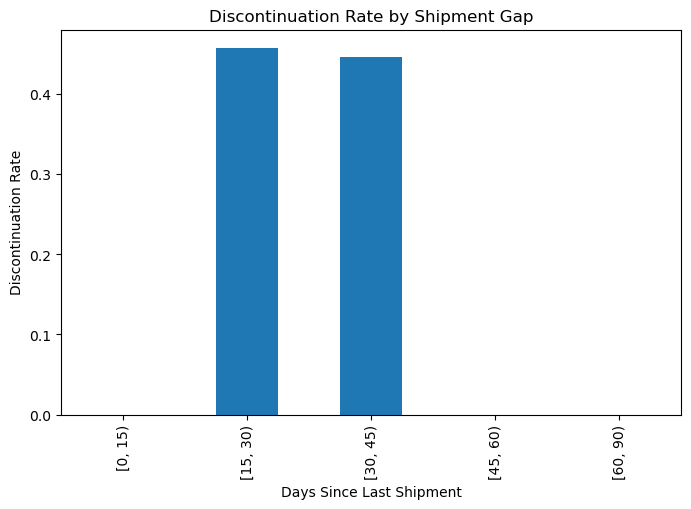

In [38]:
# Bucket shipment gaps
anchor_features["shipment_gap_bucket"] = pd.cut(
    anchor_features["days_since_last_shipment"],
    bins=[0, 15, 30, 45, 60, 90],
    right=False
)

bucket_summary = (
    anchor_features
    .groupby("shipment_gap_bucket")["discontinued_within_60d"]
    .mean()
)

bucket_summary.plot(kind="bar", figsize=(8,5))
plt.title("Discontinuation Rate by Shipment Gap")
plt.ylabel("Discontinuation Rate")
plt.xlabel("Days Since Last Shipment")
plt.show()

15–30 days → ~45–47% discontinuation

30–45 days → ~43–45% discontinuation

Comparing this to our baseline:

Baseline discontinuation ≈ 23%

That means *Once patients cross ~15 days since last shipment at the anchor, their risk nearly doubles*.

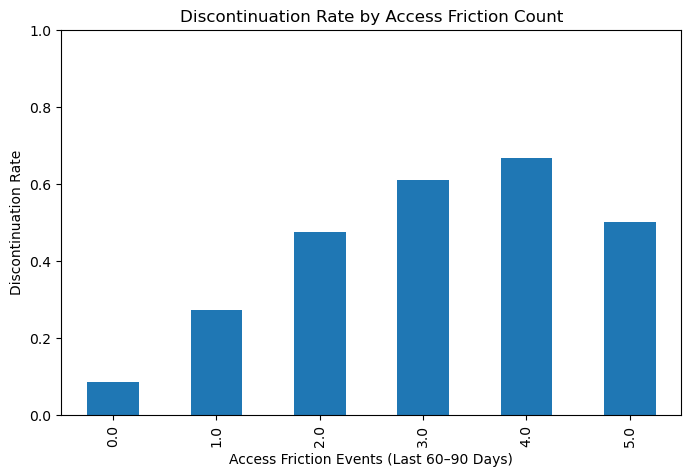

In [35]:
friction_summary = (
    anchor_features
    .groupby("access_friction_event_count")["discontinued_within_60d"]
    .mean()
)

plt.figure(figsize=(8, 5))
friction_summary.plot(kind="bar")
plt.title("Discontinuation Rate by Access Friction Count")
plt.xlabel("Access Friction Events (Last 60–90 Days)")
plt.ylabel("Discontinuation Rate")
plt.ylim(0, 1)
plt.show()

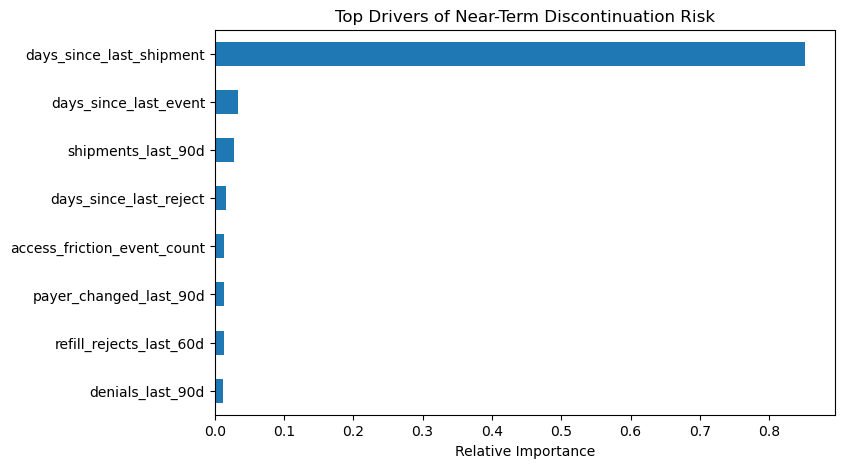

In [36]:
top_features = feature_importance.head(8)

plt.figure(figsize=(8, 5))
top_features.sort_values().plot(kind="barh")
plt.title("Top Drivers of Near-Term Discontinuation Risk")
plt.xlabel("Relative Importance")
plt.ylabel("")
plt.show()

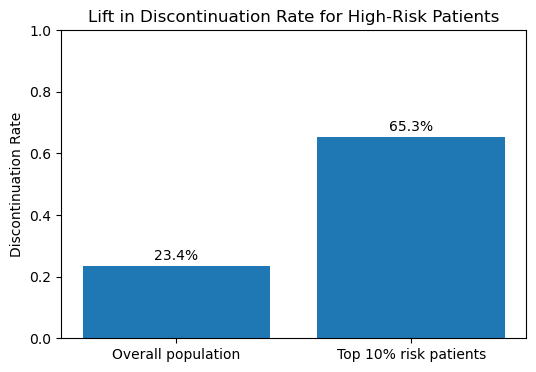

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

overall_rate = anchor_features["discontinued_within_60d"].mean()

top_decile_rate = 0.6533  

rate_df = pd.DataFrame({
    "Group": ["Overall population", "Top 10% risk patients"],
    "Discontinuation Rate": [overall_rate, top_decile_rate]
})

plt.figure(figsize=(6, 4))
plt.bar(rate_df["Group"], rate_df["Discontinuation Rate"])
plt.ylim(0, 1)
plt.ylabel("Discontinuation Rate")
plt.title("Lift in Discontinuation Rate for High-Risk Patients")

for i, val in enumerate(rate_df["Discontinuation Rate"]):
    plt.text(i, val + 0.02, f"{val:.1%}", ha="center")

plt.show()


In [32]:
# Score all patients

anchor_features["risk_score"] = gb_model.predict_proba(X)[:, 1]

anchor_features = anchor_features.sort_values(
    "risk_score", ascending=False
)

anchor_features[
    ["patient_id", "risk_score", "discontinued_within_60d"]
].head(10)

,patient_id,risk_score,discontinued_within_60d
2613,PAT_02614,0.950373,1.0
2123,PAT_02124,0.949087,1.0
564,PAT_00565,0.943223,1.0
892,PAT_00893,0.938734,1.0
482,PAT_00483,0.934483,1.0
2491,PAT_02492,0.929907,1.0
668,PAT_00669,0.910068,1.0
2674,PAT_02675,0.910068,1.0
1690,PAT_01691,0.909274,0.0
2853,PAT_02854,0.906983,1.0


In [33]:
# Risk tiers

anchor_features["risk_tier"] = pd.qcut(
    anchor_features["risk_score"],
    q=[0, 0.7, 0.9, 1.0],
    labels=["Low", "Medium", "High"]
)

anchor_features["risk_tier"].value_counts()

risk_tier
Low       2101
Medium     599
High       300
Name: count, dtype: int64

I segmented patients into low, medium, and high risk tiers based on model scores. This tiering enables capacity-aware outreach, allowing field teams to prioritize high-risk patients first

In [37]:
# High-risk patient list for field action

high_risk_patients = anchor_features.loc[
    anchor_features["risk_tier"] == "High",
    [
        "patient_id",
        "risk_score",
        "days_since_last_shipment",
        "refill_rejects_last_60d",
        "denials_last_60d",
        "payer_changed_last_90d",
        "access_friction_event_count"
    ]
]

high_risk_patients.head(10)

,patient_id,risk_score,days_since_last_shipment,refill_rejects_last_60d,denials_last_60d,payer_changed_last_90d,access_friction_event_count
2613,PAT_02614,0.950373,25.0,2.0,0.0,0.0,2.0
2123,PAT_02124,0.949087,25.0,1.0,0.0,2.0,3.0
564,PAT_00565,0.943223,25.0,1.0,0.0,2.0,3.0
892,PAT_00893,0.938734,25.0,3.0,0.0,0.0,3.0
482,PAT_00483,0.934483,30.0,1.0,2.0,2.0,5.0
2491,PAT_02492,0.929907,25.0,0.0,0.0,1.0,1.0
668,PAT_00669,0.910068,32.0,2.0,0.0,0.0,2.0
2674,PAT_02675,0.910068,32.0,2.0,0.0,0.0,2.0
1690,PAT_01691,0.909274,25.0,3.0,0.0,1.0,4.0
2853,PAT_02854,0.906983,30.0,3.0,0.0,1.0,4.0


### Field Support Action Framework

The model output is designed to support targeted, capacity-aware intervention.

**Primary trigger: Shipment gap**
- Long gaps since last shipment indicate imminent therapy interruption.
- Best Action would be Immediate refill coordination and pharmacy follow-up.

**Secondary trigger: Refill rejections or denials**
- Recent rejections signal unresolved payer or coverage issues.
- Action involves Payer escalation, benefits investigation, and affordability review.

**Escalation trigger: Multiple access friction events**
- Repeated friction suggests compounding barriers.
- Actionable steps should be Coordinated outreach involving patient support, caregiver engagement,
  and payer re-verification.